























































































## Data Preparation

In [ ]:
#Import some basic libraries
import numpy as np
import pandas as pd

**Next, we read the dataset and store it into a dataframe using the read_csv() function from the Pandas library.**

In [ ]:
#Read the data present in dataset
data = pd.read_csv('/content/maindataset.csv')


**After that, we view the first few rows of the dataframe to get a glimpse of it. To do this, we use the head() function from the Pandas library.**

In [ ]:
# viewing the first 15 rows
data.head(15)

,Location,Month,Time,Volume,Status
0,1,1,07:30:00,17,0
1,2,1,07:30:00,41,75
2,3,1,07:30:00,29,0
3,4,1,07:30:00,65,75
4,5,1,07:30:00,21,0
5,1,1,07:30:00,15,0
6,2,1,07:30:00,54,75
7,3,1,07:30:00,53,75
8,4,1,07:30:00,58,75
9,5,1,07:30:00,98,100


### Exploratory Analysis & Visualization
**Now that we imported neccessary libraries and loaded the dataset. we will proceed with analysis and visualization.**

In [ ]:
#Descriptive Statistics
# describing the dataset

data.describe()

,Location,Month,Volume,Status
count,480.000000,480.000000,480.000000,480.000000
mean,3.000000,6.477083,50.014583,56.875000
std,1.415689,3.455578,29.444364,39.167018
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,3.000000,24.000000,0.000000
50%,3.000000,6.000000,51.000000,75.000000
75%,4.000000,9.000000,76.000000,75.000000
max,5.000000,12.000000,100.000000,100.000000


In [ ]:
# lets check the no. of unique items present in the categorical column

data.select_dtypes('object').nunique()

Time    1
dtype: int64

In [ ]:
data.shape

(480, 5)

**We have 480 rows and 5 cols, since we have only less cols and rows - It's easy to train the model. It's important to notice that datasets contains only floats and ints. So there is no need to use One Hot Encoder**

Let's analysis more

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  480 non-null    int64 
 1   Month     480 non-null    int64 
 2   Time      480 non-null    object
 3   Volume    480 non-null    int64 
 4   Status    480 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 18.9+ KB


In [ ]:
#We got all the information we need.
#Now it's time for some visualization. First Let's figure out the names of the columns
data.columns

Index(['Location', 'Month', 'Time', 'Volume ', 'Status'], dtype='object')

In [ ]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

Location    0
Month       0
Time        0
Volume      0
Status      0
dtype: int64

In [ ]:
#Let's see how are data looks like now
data.head()

,Location,Month,Time,Volume,Status
0,1,1,07:30:00,17,0
1,2,1,07:30:00,41,75
2,3,1,07:30:00,29,0
3,4,1,07:30:00,65,75
4,5,1,07:30:00,21,0


In [ ]:
dfnew = data.replace('[^\d.]', '', regex = True).astype(float)
dfnew

,Location,Month,Time,Volume,Status
0,1.0,1.0,73000.0,17.0,0.0
1,2.0,1.0,73000.0,41.0,75.0
2,3.0,1.0,73000.0,29.0,0.0
3,4.0,1.0,73000.0,65.0,75.0
4,5.0,1.0,73000.0,21.0,0.0
...,...,...,...,...,...
475,1.0,1.0,73000.0,64.0,75.0
476,2.0,1.0,73000.0,84.0,100.0
477,3.0,1.0,73000.0,37.0,75.0
478,4.0,1.0,73000.0,94.0,100.0


## Splitting the Dataset

**Now with the help of Python iloc() function we  select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset**.

In [ ]:
x =dfnew.iloc[:,1:4]
x.head()

,Month,Time,Volume
0,1.0,73000.0,17.0
1,1.0,73000.0,41.0
2,1.0,73000.0,29.0
3,1.0,73000.0,65.0
4,1.0,73000.0,21.0


In [ ]:
y = dfnew.iloc[:, -1]
y.head()

0     0.0
1    75.0
2     0.0
3    75.0
4     0.0
Name: Status, dtype: float64

In [ ]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)


array([[0.  , 0.  , 0.17],
       [0.  , 0.  , 0.41],
       [0.  , 0.  , 0.29],
       ...,
       [0.  , 0.  , 0.37],
       [0.  , 0.  , 0.94],
       [0.  , 0.  , 0.81]])

In [ ]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#Let's see how our train set looks like
x_train.head()

,Month,Time,Volume
101,3.0,73000.0,36.0
69,2.0,73000.0,74.0
92,3.0,73000.0,16.0
230,6.0,73000.0,80.0
418,11.0,73000.0,17.0


In [ ]:
y_train.head()

101    75.0
69     75.0
92      0.0
230    75.0
418     0.0
Name: Status, dtype: float64

## Prediction Algorithms:
## KNN Classifier

In [ ]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [ ]:
#Let's predict chances of bin getting filled
#this are the results that are predicted after collecting the waste in the bins,based on the amount of waste the predicted values are given that is 0,75 and 100
y_predict = knn_clf.predict(x_test)
print('predicted chances of bin getting filled')
print(y_predict)

predicted chances of bin getting filled
[  0.   0. 100.  75.   0.   0.  75.  75.   0.  75.   0.  75.  75.  75.
 100.   0.  75. 100. 100.   0.   0.  75.  75.  75.   0.  75.  75.  75.
  75. 100.   0. 100.   0.   0.  75.  75.  75.  75.  75.   0.  75.  75.
   0.  75.  75.   0.  75.  75.   0.  75. 100.  75.   0.  75.   0.   0.
 100.   0.  75.  75.   0.   0.   0.   0.   0. 100. 100.  75.  75.  75.
  75. 100. 100.   0.  75.  75.  75.  75.   0.   0.   0. 100. 100.   0.
  75. 100.  75.   0.  75.   0.  75.  75.   0.  75. 100.   0.]


In [ ]:
#Actual chances of status
print("actual values of status:")
print(y_test)

actual values of status:
458      0.0
299      0.0
478    100.0
27      75.0
212      0.0
       ...  
145     75.0
467      0.0
436     75.0
142    100.0
257      0.0
Name: Status, Length: 96, dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [ ]:
knn_accuracy.mean()

0.9791666666666666

# Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

## Logistic Regression

In [ ]:
# splitting the dependent and independent variables
# input
x = dfnew.iloc[:, [2, 3]].values
 
# output
y = dfnew.iloc[:, 4].values
print(x.shape)
print(y.shape)

(480, 2)
(480,)


In [ ]:
# splitting the dataset into training and test sets
#Splitting the dataset to train and test. 75% of data is used for training the model and 25% of it is used to test the performance of our model. 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(360, 2)
(360,)
(120, 2)
(120,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(x_train)
xtest = sc_x.transform(x_test) 
print (xtrain[0:10, :])

[[ 0.         -1.54758569]
 [ 0.          1.29941463]
 [ 0.          1.09605746]
 [ 0.         -1.31033566]
 [ 0.          0.1131645 ]
 [ 0.         -0.80194275]
 [ 0.         -1.03919277]
 [ 0.          0.35041452]
 [ 0.         -1.61537141]
 [ 0.         -0.12408553]]


In [ ]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)
lr_accuracy.mean()

0.775

In [ ]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of bins getting filled')
print(y_predict)

Predicted chances of bins getting filled
[ 75.  75. 100.  75.   0.  75.   0.  75.   0.   0.  75. 100.  75.   0.
 100.   0.  75.  75.  75.  75.  75.  75. 100.  75.  75.  75.  75.  75.
   0.  75.  75.   0.  75.  75.   0.  75.  75. 100.   0.  75.  75.  75.
  75.  75.  75.  75.   0.  75. 100.  75.  75.   0. 100.  75.   0.  75.
   0.   0.  75.  75. 100. 100.   0. 100.  75.   0.  75.  75.  75.  75.
   0.  75.  75.  75.  75.   0.  75.   0.   0.  75.  75. 100.   0.   0.
   0.   0.  75.  75.  75.  75.  75. 100.   0.  75. 100.   0.  75.  75.
 100.  75.  75.   0.  75.  75.  75.  75.  75.   0.  75.  75.   0.   0.
   0. 100. 100.  75.  75.   0.   0.   0.]


# HERE WE HAVE SHOWEN THE RELATION BETWEEN LOCATION AND VOLUME
**i**.e AMOUNT OF WASTE COLLECTED IN PARTICULAR PLACE AT PRE-DEFINED TIME
**WHETHER** IT IS MODERATE ,EMPTY OR FULL

**Seaborn is a library in Python predominantly used for making statistical graphics. Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python. Visualization is the central part of Seaborn which helps in exploration and understanding of data.**

     |████████████████████████████████| 558 kB 35.6 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


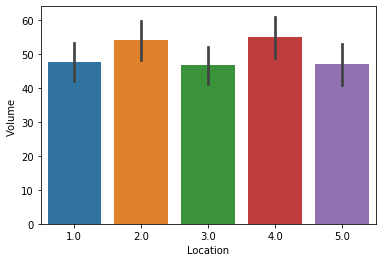

In [ ]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install dabl
import dabl
sns.barplot(x = 'Location',
            y = 'Volume ',
            data = dfnew)
 
# Show the plot
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


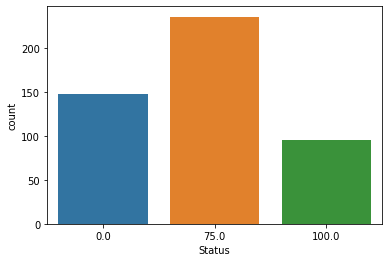

In [ ]:
import seaborn as sns
sns.countplot(dfnew['Status'])


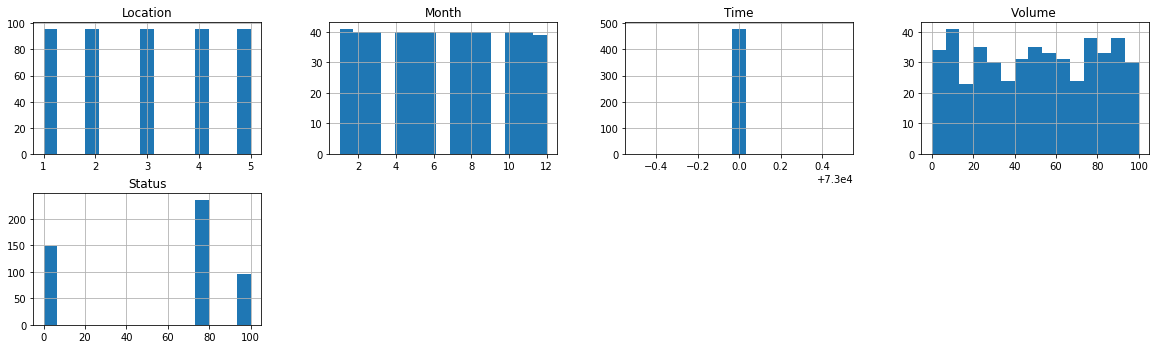

In [ ]:
#In this we must take all the numeric cols and make a list out of it first
o_cols = dfnew.select_dtypes(include=['object']).columns.tolist()
num_cols = dfnew.select_dtypes(exclude=['object']).columns.tolist()
dfnew[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

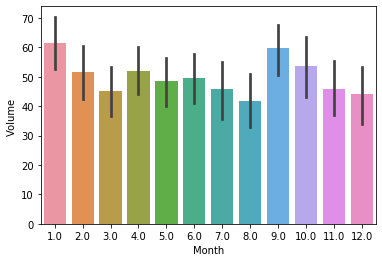

In [ ]:
sns.barplot(y = 'Volume ',
            x = 'Month',
            data = dfnew)
 
# Show the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  480 non-null    float64
 1   Month     480 non-null    float64
 2   Time      480 non-null    float64
 3   Volume    480 non-null    float64
 4   Status    480 non-null    float64
dtypes: float64(5)
memory usage: 18.9 KB


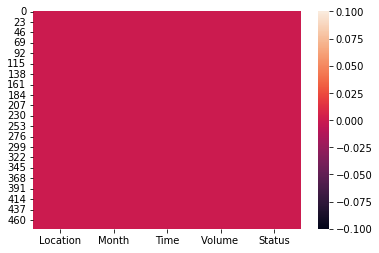

In [ ]:
#Get information about the dataset
#Use the info() function to get details about the data types of the dataset
#Use seaborn’s heatmap() function to check which values are null
#A heatmap contains values representing various shades of the same colour for each value to be plotted.
#Usually the darker shades of the chart represent higher values than the lighter shade.
#For a very different value a completely different colour can also be used.
import seaborn as sb
dfnew.info()
sb.heatmap(dfnew.isnull())

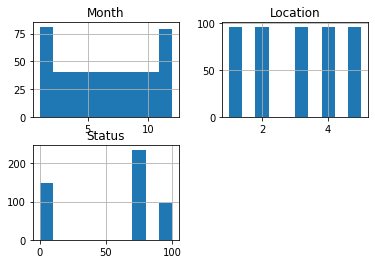

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
c = dfnew[['Month','Location','Status']]
c.hist()
plt.show()

**This model uses machine learning technique (KNN) to send alert messages to concern society authority with 96.875% accuracy.IoT and machine learning-based household waste management systems for a Green smart society are aimed to make the management of waste from every apartment of the society more efficient using the most upcoming technology IoT. IOT-based Dustbins help people to manage their waste easily and help them reduce the work of calling or waiting for a specific person to make the area clean and make a healthier environment to live in. They won’t be any kind of diseases and the people will be fit and are not prone to diseases caused by these waste materials. The mission of Swachh Bharat can also be implemented easily. This system assures the cleaning of dustbins soon when the garbage level reaches its maximum. If the dustbin is not cleaned in a specific time, then the record is sent to the Sweeper or higher authority who can take appropriate action against the concerned contractor. It ultimately helps in keeping the surroundings clean and waste management can be much easier. the same thing can be done using data analysis and this can be carried out in collab using different machine learning algorithms to predict the amount of waste generated**